In [355]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Importing data and taking what's relevant

When importing a file from GitHub, either:
1. "?raw=true" need to be added to the url
2. click the "raw" button and use that url

##### Hospitalized and Infected Table

In [356]:
url = "https://github.com/dancarmoz/israel_moh_covid_dashboard_data/blob/master/hospitalized_and_infected.csv?raw=true"
cases = pd.read_csv(url)

cases['Date'] = pd.to_datetime(cases['Date'], format='%Y-%m-%d') #parsing dates
cases = cases.loc[:,['Date','New infected','Hospitalized','Official R','Epidemiological Event']] #extracting columns

##### Vaccinated Table

In [357]:
url = "https://github.com/dancarmoz/israel_moh_covid_dashboard_data/blob/master/vaccinated.csv?raw=true"
vaccinated = pd.read_csv(url)

vaccinated['Date'] = pd.to_datetime(vaccinated['Date'], format='%Y-%m-%d') #parsing dates
vaccinated = vaccinated.loc[:,['Date','Vaccinated (daily)','Second dose (daily)','Third dose (daily)']] #extracting columns
vaccinated.rename(columns={"Vaccinated (daily)":"First dose (daily)"}, inplace=True)

##### Merge

In [358]:
data = cases.merge(vaccinated, how = 'outer', on= ['Date'])
data.set_index('Date', inplace=True)
data.tail()

,New infected,Hospitalized,Official R,Epidemiological Event,First dose (daily),Second dose (daily),Third dose (daily)
Date,,,,,,,
2021-12-30,5078,207,NaN,NaN,11022.0,7697.0,12085.0
2021-12-31,5483,226,NaN,NaN,4832.0,3652.0,7206.0
2022-01-01,4222,225,NaN,NaN,1992.0,1580.0,2720.0
2022-01-02,6562,245,NaN,NaN,10178.0,6434.0,12722.0
2022-01-03,2304,203,NaN,NaN,0.0,0.0,0.0


In [359]:
today = datetime.date.today() #edit the date format

last_week = data.tail(7)
last_month = data.tail(30)

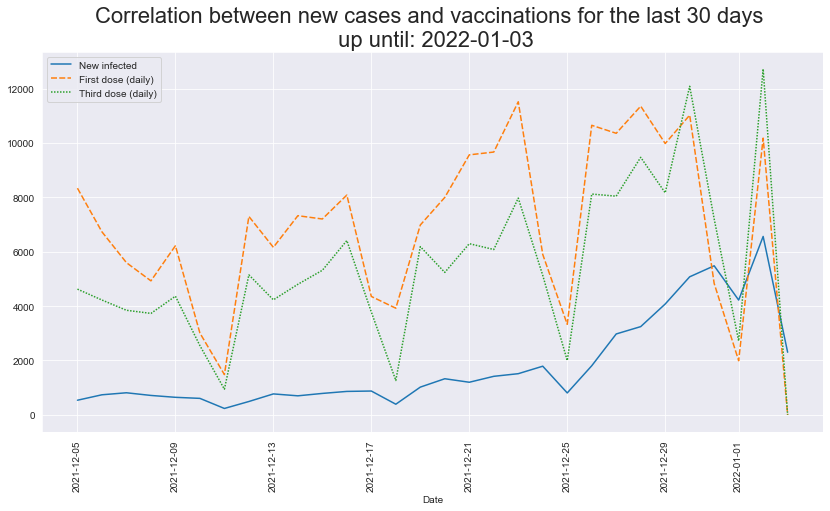

In [360]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,1, figsize=(14,7))
ax.set_title('Correlation between new cases and vaccinations for the last 30 days \n up until: {}'.format(today), size = 22)

sns.lineplot(data = last_month[['New infected', 'First dose (daily)', 'Third dose (daily)']])
plt.xticks(rotation=90)
plt.savefig ("Month_correlation {}.png".format(today),bbox_inches ="tight", dpi=100)
plt.show()

#### Add daily change in percentage

In [361]:
data_num = data.drop(['Epidemiological Event'], axis=1)
data_num = data_num.replace(0,None) #replacing values of '0' with 'None' replaces them with the value of the cell above
                                    #meaning that a day with 0 infections does not make a difference 
                                    #otherwise it would create a problem with the previous and following cells' calculations
                                    #num/0=undefined and 0/num=0

d_change = round(data_num/data_num.shift(1)*100) #the rario in percent of change by day - dividing each data point 
                                                 #by that of the previous day's to see how much it has changed
d_change.tail()

,New infected,Hospitalized,Official R,First dose (daily),Second dose (daily),Third dose (daily)
Date,,,,,,
2021-12-30,125.0,108.0,NaN,110.0,130.0,148.0
2021-12-31,108.0,109.0,NaN,44.0,47.0,60.0
2022-01-01,77.0,100.0,NaN,41.0,43.0,38.0
2022-01-02,155.0,109.0,NaN,511.0,407.0,468.0
2022-01-03,35.0,83.0,NaN,100.0,100.0,100.0


In [362]:
#growth ratio replaced by percentage

for column in d_change.columns: #loop over all of the columns in the dataframe
    d_change[column] = d_change[column].apply(lambda x: 0 if x == 100 else x-100) #applying function on all the rows 
                                                                                  #in a given column
    #translating change ratio into growth:
        #when the ratio is 100 (meaning no change) the growth will be 0
        #when the ratio is over 100 (positive growth) the growth increase is of (x-100) percent
        #when the ratio is lesser than 100 (negative growth, positive number) the growth decrease is also of (x-100) percent
            #it's the same as saying that 30% of a number is the number minus 70%
            #30% of 120 is 36, 120-70%(of 120) is also 36
            
d_change.tail()

,New infected,Hospitalized,Official R,First dose (daily),Second dose (daily),Third dose (daily)
Date,,,,,,
2021-12-30,25.0,8.0,NaN,10.0,30.0,48.0
2021-12-31,8.0,9.0,NaN,-56.0,-53.0,-40.0
2022-01-01,-23.0,0.0,NaN,-59.0,-57.0,-62.0
2022-01-02,55.0,9.0,NaN,411.0,307.0,368.0
2022-01-03,-65.0,-17.0,NaN,0.0,0.0,0.0


In [363]:
last_week_change = d_change.tail(7)
last_month_change = d_change.tail(30)

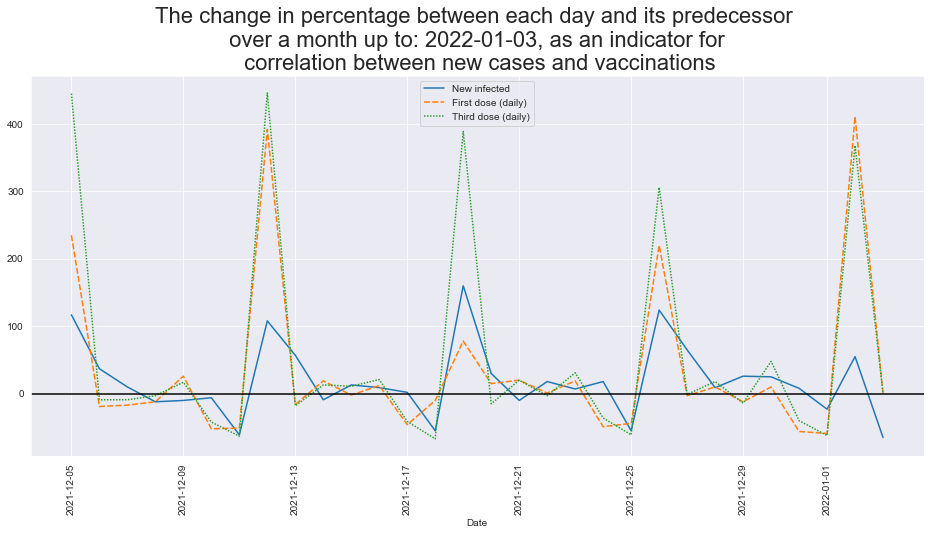

In [365]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,1, figsize=(16,7))
ax.set_title('The change in percentage between each day and its predecessor \n over a month up to: {}, as an indicator for \n correlation between new cases and vaccinations'.format(today), size = 22)

sns.lineplot(data = last_month_change[['New infected', 'First dose (daily)', 'Third dose (daily)']])
plt.xticks(rotation=90)
plt.axhline(0, color = 'black')

plt.savefig ("Month_correlation_percentage {}.png".format(today),bbox_inches ="tight", dpi=100)
plt.show()